# Swath profile with scatter plot

It is sometimes desired to plot the geological features with the swath profile. For example, plot the glacial points coupling with the mountain range profile [(Dortch et al. 2011)](https://www.sciencedirect.com/science/article/pii/S0169555X11004120). PyOSP provides simple workflow to plot such figures.

## Step 1. Save features as points in shapefile

As shown below, we randomly drew four points within the range of mountain. These are saved as *checking_points.shp*.

<img alt="homo_case" src="https://i.imgur.com/AM5fnnC.png" height="250"/>

## Step 2. Generate the swath object



In [1]:
import pyosp

baseline = pyosp.datasets.get_path("homo_baseline.shp") # the path to baseline shapefile
raster = pyosp.datasets.get_path("homo_mount.tif")  # the path to raster file

elev = pyosp.Elev_curv(baseline, raster, width=100,
                       min_elev=0.01,
                       line_stepsize=3, cross_stepsize=None)

Processing: [#########################] 71 of 71 lineSteps

## Step 3. Plot the scatter with the swath profile

If we pass the points path to the method *profile_plot*, these points' distance and elevation information will be processed and plot in the same figure of swath profile.


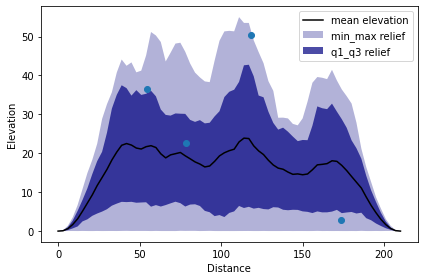

In [2]:
from pyosp import point_coords

pointsPath = pyosp.datasets.get_path("checking_points.shp")

elev.profile_plot(points=pointsPath)

We can make some changes to the figure to make it clear. 

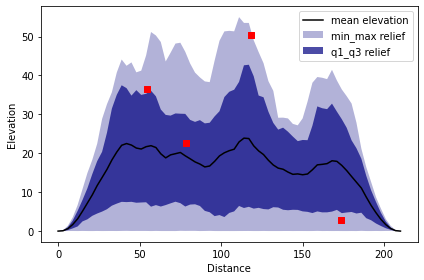

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Note parameter "color" means color of swath profile, "c" and additional
# parameters are passed to the Matplolib scatter function.
elev.profile_plot(ax=ax, points=pointsPath, color="navy", c="red", marker="s")


Note that method *profile_plot* has addotional parameters *start* and *end*. By defining those, user can limit the distance range to be plotted.

**User can offer simple values to these parameters. Also, parameters can be defined by points on baseline to indicate the starting and ending locations, as shown below.**

<img alt="homo_case" src="https://i.imgur.com/9QUKGDT.png" height="250"/>



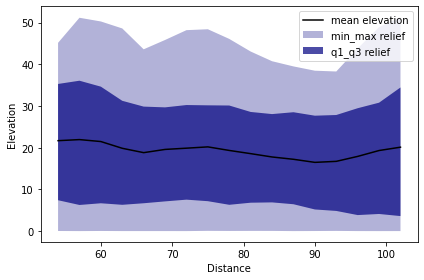

In [5]:
from pyosp import point_coords

pointsPath = pyosp.datasets.get_path("homo_start_end.shp") # the path to the points

pointsCoords = point_coords(pointsPath)

# we drew the ending points first here
elev.profile_plot(start=pointsCoords[1], end=pointsCoords[0])